In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

In [5]:
df = pd.read_csv("F:/dataset_for_ML/Ensemble Learning/classification/breastcancerpredictionwinconsin.csv")

In [6]:
df.drop(columns=["id","Unnamed: 32"],inplace=True)

In [7]:
X = df.iloc[:,1:]
y = df["diagnosis"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],  
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [0.5, 1.0, 1.5]
}


In [19]:
model = CatBoostClassifier()

In [20]:
rs = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='accuracy',  
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [21]:
rs.fit(X_train,y_train)

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
7 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_mod

0:	learn: 0.4575893	total: 138ms	remaining: 1m 8s
1:	learn: 0.2752674	total: 142ms	remaining: 35.3s
2:	learn: 0.2164867	total: 147ms	remaining: 24.3s
3:	learn: 0.1804610	total: 151ms	remaining: 18.7s
4:	learn: 0.1407875	total: 153ms	remaining: 15.2s
5:	learn: 0.1199762	total: 159ms	remaining: 13.1s
6:	learn: 0.1004560	total: 161ms	remaining: 11.4s
7:	learn: 0.0929202	total: 164ms	remaining: 10.1s
8:	learn: 0.0824799	total: 166ms	remaining: 9.04s
9:	learn: 0.0763767	total: 168ms	remaining: 8.24s
10:	learn: 0.0606890	total: 171ms	remaining: 7.61s
11:	learn: 0.0563481	total: 175ms	remaining: 7.11s
12:	learn: 0.0541141	total: 177ms	remaining: 6.63s
13:	learn: 0.0487195	total: 179ms	remaining: 6.21s
14:	learn: 0.0453978	total: 182ms	remaining: 5.87s
15:	learn: 0.0408365	total: 184ms	remaining: 5.57s
16:	learn: 0.0373165	total: 187ms	remaining: 5.32s
17:	learn: 0.0347325	total: 191ms	remaining: 5.11s
18:	learn: 0.0317929	total: 196ms	remaining: 4.96s
19:	learn: 0.0302581	total: 198ms	remaini

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000015EEEF4C1C0>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.0, 0.5, 1.0],
                                        'border_count': [32, 64, 128],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [100, 300, 500],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'random_strength': [0.5, 1.0, 1.5]},
                   random_state=42, scoring='accuracy')

In [26]:
rs.best_params_,rs.best_score_

({'random_strength': 1.0,
  'learning_rate': 0.2,
  'l2_leaf_reg': 1,
  'iterations': 500,
  'depth': 4,
  'border_count': 32,
  'bagging_temperature': 0.0},
 0.9714040896944347)

In [27]:
pred = rs.predict(X_test)

In [28]:
print(classification_report(pred,y_test)),print(accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           B       0.99      0.97      0.98        72
           M       0.95      0.98      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158


(None, None)

<Axes: >

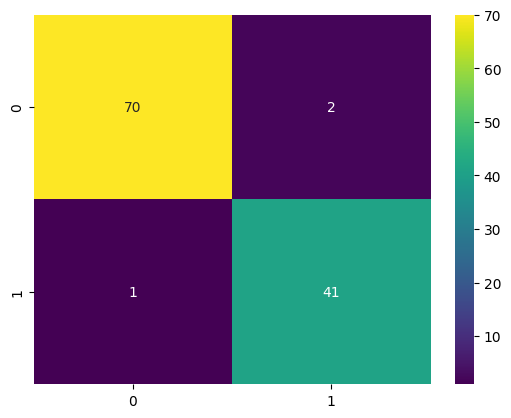

In [30]:
sns.heatmap(confusion_matrix(pred,y_test),cmap='viridis',fmt='.2g',annot=True)

In [41]:
rs.predict_proba(X_test)

array([[9.98736179e-01, 1.26382112e-03],
       [3.74311959e-05, 9.99962569e-01],
       [2.06905236e-04, 9.99793095e-01],
       [9.99957368e-01, 4.26316959e-05],
       [9.99998829e-01, 1.17142903e-06],
       [4.81933906e-06, 9.99995181e-01],
       [6.78129662e-05, 9.99932187e-01],
       [1.36595823e-02, 9.86340418e-01],
       [3.81321159e-02, 9.61867884e-01],
       [9.99937280e-01, 6.27203099e-05],
       [9.99173296e-01, 8.26704481e-04],
       [9.13010775e-04, 9.99086989e-01],
       [9.99582333e-01, 4.17667401e-04],
       [3.50236680e-03, 9.96497633e-01],
       [9.99887939e-01, 1.12061086e-04],
       [5.97696142e-05, 9.99940230e-01],
       [9.99976655e-01, 2.33454324e-05],
       [9.99997257e-01, 2.74346855e-06],
       [9.99994635e-01, 5.36522045e-06],
       [4.75283450e-05, 9.99952472e-01],
       [9.87863116e-01, 1.21368840e-02],
       [9.99978987e-01, 2.10129590e-05],
       [6.13429009e-06, 9.99993866e-01],
       [9.99806743e-01, 1.93256815e-04],
       [9.999505

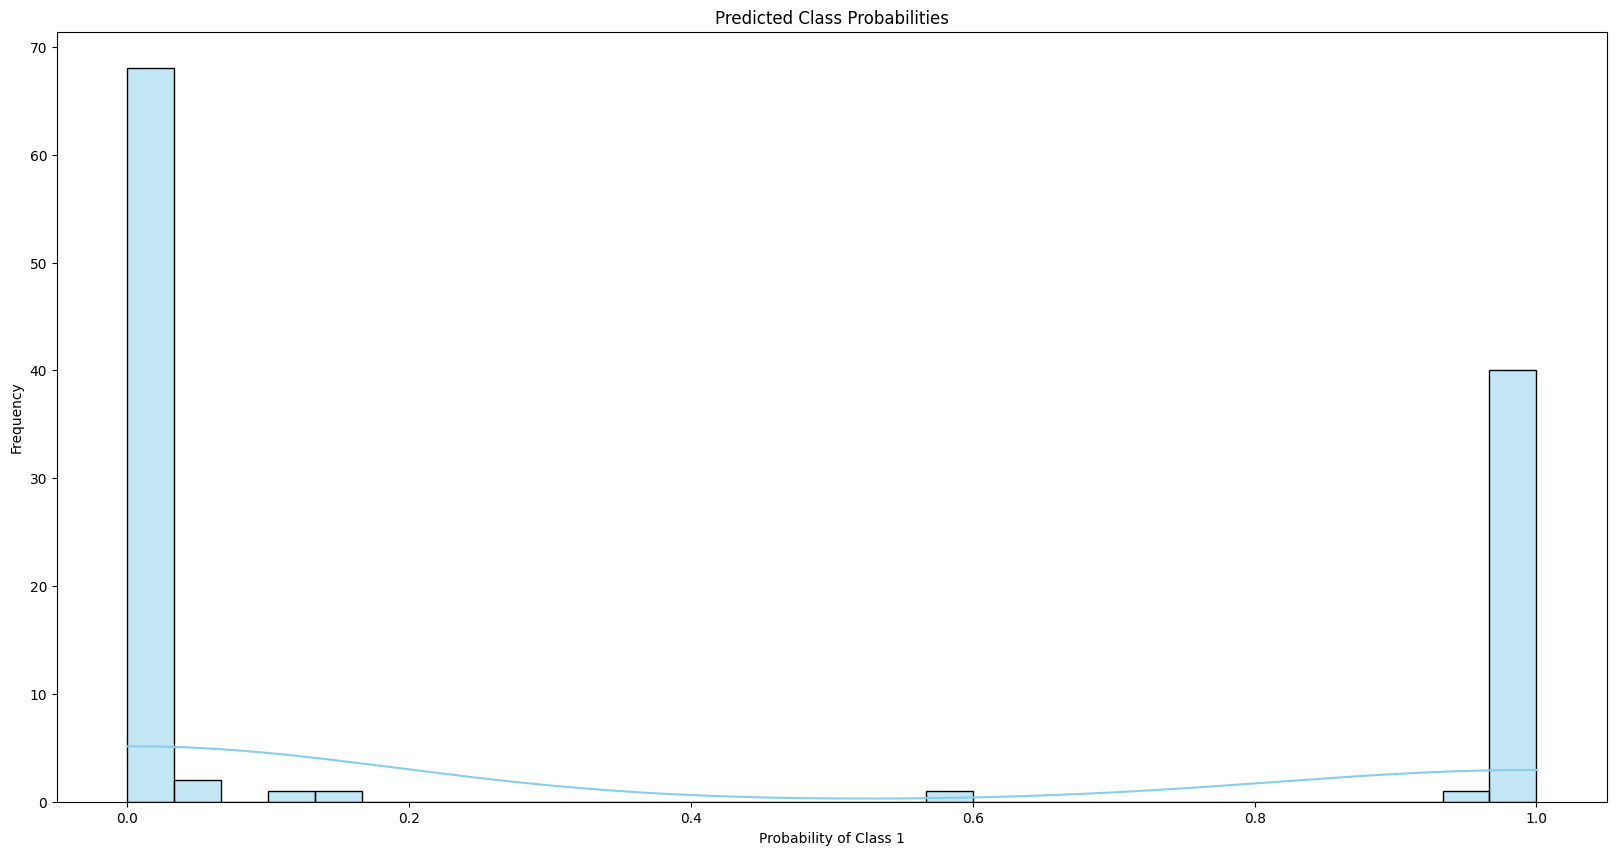

In [42]:
y_prob = rs.predict_proba(X_test)[:, 1]

plt.figure(figsize=(20,10))
sns.histplot(y_prob, kde=True, bins=30, color='skyblue')
plt.title("Predicted Class Probabilities")
plt.xlabel("Probability of Class 1")
plt.ylabel("Frequency")
plt.show()